In [453]:
%store -r __toolboxforsalesdata

In [454]:
__toolboxforsalesdata

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [455]:
df_train = pd.read_csv('train_full_lag1_lag2_season.csv')

In [472]:
check_rakh = pd.read_csv('train_full_lag1_lag2_season.csv')

In [456]:
df_train.drop("Unnamed: 0", axis = 1, inplace = True)

In [457]:
df_train.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_cnt_month',
       'item_category_id', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature'],
      dtype='object')

In [458]:
df_test = pd.read_csv('test_full_lag1_lag2_seasonal.csv')

In [459]:
df_test.drop("Unnamed: 0", axis = 1, inplace = True)

In [460]:
train_33, val_33 = month_split(df_train, 33)

In [461]:
train_33.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature
0,0,32,0,221.0,6.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765
1,0,33,0,347.0,3.0,37,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765
2,0,35,0,247.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765
3,0,43,0,221.0,1.0,40,False,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765
4,0,51,0,128.5,2.0,57,True,NaN,NaN,NaN,NaN,NaN,NaN,-0.063765


In [462]:
val_33.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature
1577591,2,31,33,399.0,1.0,37,False,NaN,9.0,2989.0,1.507259,NaN,1.962963,-0.063765
1577592,2,486,33,300.0,3.0,73,False,1.0,110.0,260.0,2.044248,NaN,3.666667,-0.063765
1577593,2,787,33,420.0,1.0,49,False,NaN,22.0,580.0,1.806962,NaN,2.800000,-0.063765
1577594,2,794,33,3300.0,1.0,73,False,NaN,7.0,260.0,2.044248,NaN,1.333333,-0.063765
1577595,2,968,33,58.0,1.0,40,False,NaN,10.0,6779.0,1.614451,NaN,1.111111,-0.063765


In [463]:
len(np.unique(df_train['item_category_id']))

84

In [464]:
len(np.unique(df_test['item_category_id']))

15306

In [465]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors

In [466]:
#Imputing all Nans with zero in lag columns as only if there were no sales in lagged features that we have got nan,
#But this is wrong for unique 0 (lag1,lag2) and unique (lag2) as we do not have information about these, therefore moving with
#some assumption.
train_33_imputed = train_33.fillna(0)

In [467]:
val_33_imputed = val_33.fillna(0)

In [468]:
test_33_imputed = df_test[df_test.columns.difference(['shop_id', 'ID', 'item_id', 'item_category_id', 'indicator', 'is_music', 'item_price'])].fillna(0)

In [469]:
sum(pd.isnull(df_test['is_music']))

15246

In [470]:
test_33_imputed_f = pd.concat([df_test[['shop_id', 'ID', 'item_id', 'item_category_id', 'indicator', 'is_music', 'item_price']], test_33_imputed], axis = 1)

In [475]:
test_33_imputed_f.head()

,shop_id,ID,item_id,item_category_id,indicator,is_music,item_price,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,lag_only_item_cat,lag_shop_item_comb,seasonal_freq_3_feature,unique
0,5,0,5037,19.0,1,False,1693.518519,3.793103,2.312028,1.0,25.0,2443.0,0.0,-0.047512,34
1,5,1,5320,NaN,0,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.047512,34
2,5,2,5233,19.0,2,False,859.000000,2.666667,2.312028,3.0,42.0,2443.0,1.0,-0.047512,34
3,5,3,5232,23.0,1,False,599.000000,1.846154,2.201104,0.0,28.0,2203.0,0.0,-0.047512,34
4,5,4,5268,NaN,0,NaN,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.047512,34


In [324]:
#Trying features based on nearest categories

In [325]:
#Mean of is_music/is_not music in that month

In [476]:
#With trimmed item_cnt_month
train_33_imputed_copy = train_33_imputed.copy()

In [327]:
#Trimming tha target_valraible to [0,20], lets not do this, did do any better. It is worsening the linear model.
#train_33_imputed.loc[train_33_imputed['item_cnt_month']>20, 'item_cnt_month'] = 20
#train_33_imputed.loc[train_33_imputed['item_cnt_month']<0, 'item_cnt_month'] = 0

In [328]:
#Trimming tha target_valraible to [0,20]
#val_33_imputed.loc[val_33_imputed['item_cnt_month']>20, 'item_cnt_month'] = 20
#val_33_imputed.loc[val_33_imputed['item_cnt_month']<0, 'item_cnt_month'] = 0

In [478]:
train_33_imputed.shape

(1577591, 14)

In [477]:
category_encoding_monthly = train_33_imputed.groupby(['unique','item_category_id'])['item_cnt_month'].mean().reset_index()

In [330]:
#Now this is good to see, but I cant use this feature directly as I would have no info about sales for test, thats why I could 
#use lagged values for the features. But then nan's again[Will manage]. Make the feature/
category_encoding_monthly['unique'] = category_encoding_monthly['unique'] + 1

In [331]:
category_encoding_monthly.head()

,unique,item_category_id,item_cnt_month
0,1,0,1.000000
1,1,1,1.000000
2,1,2,2.522686
3,1,3,10.000000
4,1,4,1.930769


In [332]:
category_encoding_monthly.rename(columns={'item_cnt_month': 'prev_month_category_mean'}, inplace=True)

In [333]:
train_33_imputed_copy = train_33_imputed_copy.merge(category_encoding_monthly, how='left', on = ['unique','item_category_id'])

In [334]:
category_encoding_monthly.head()

,unique,item_category_id,prev_month_category_mean
0,1,0,1.000000
1,1,1,1.000000
2,1,2,2.522686
3,1,3,10.000000
4,1,4,1.930769


In [335]:
train_33_imputed = train_33_imputed.merge(category_encoding_monthly, how='left', on = ['unique','item_category_id'])

In [336]:
val_33_imputed = val_33_imputed.merge(category_encoding_monthly, how='left', on = ['unique','item_category_id'])

In [337]:
train_33_imputed.columns

Index(['shop_id', 'item_id', 'unique', 'item_price', 'item_cnt_month',
       'item_category_id', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature',
       'prev_month_category_mean'],
      dtype='object')

In [479]:
monitoring_data = pd.read_csv('monitoring_data.csv')

In [480]:
monitoring_data

,Unnamed: 0,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score,Features
0,0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.152129,2.163706,1.17125,Lag1
1,1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.152377,2.160372,1.16766,Lag1
2,2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.782377,2.151485,1.14767,Lag1
3,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092,ensemble_lin_xgb_0092_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.935000,2.047780,1.09124,Lag1_Lag2_Seasonal
4,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092_less_0025,ensemble_lin_xgb_0092_lag1_lag2_season_less_0025,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.936000,2.050922,1.09067,Lag1_Lag2_Seasonal


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


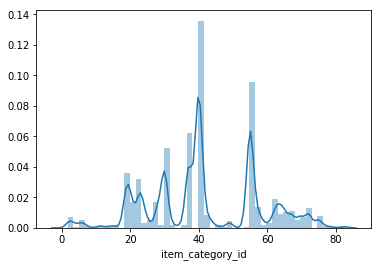

In [339]:
sns.distplot(train_33_imputed['item_category_id'])
plt.show()

In [340]:
sum(train_33_imputed['unique']==0)/len(train_33_imputed)

0.04007629353869285

```prev category mean``` cannot be filled for unique zero. As I am using xgboost. Letting it go for now.
But Have to come up with a better solution later. Or else. Feature be used less. ,,,, Letr I decided to remove the rows with unique = 0

In [341]:
train_imputed_pre_category_mean = pd.concat([train_33_imputed,val_33_imputed], axis = 0)

In [342]:
train_imputed_pre_category_mean.to_csv('train_imputed_pre_category_mean.csv')

In [343]:
train_imputed_pre_category_mean_no_trim = train_imputed_pre_category_mean.copy()

In [344]:
train_imputed_pre_category_mean_no_trim['item_cnt_month'] = df_train['item_cnt_month']

In [345]:
train_imputed_pre_category_mean_no_trim.describe()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature,prev_month_category_mean
count,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.609122e+06,1.544749e+06
mean,3.280587e+01,1.068099e+04,1.466480e+01,7.906626e+02,2.263065e+00,4.154188e+01,1.454637e+00,5.208060e+01,8.900353e+03,2.089727e+00,1.288608e+00,1.750436e+00,-3.015029e-04,2.258789e+00
std,1.653701e+01,6.238886e+03,9.542328e+00,1.532081e+03,8.418759e+00,1.632363e+01,7.989899e+00,2.328599e+02,8.656954e+03,4.558572e+00,7.630537e+00,5.585802e+00,7.908509e-02,4.728303e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-02,-2.200000e+01,0.000000e+00,-2.200000e+01,-2.200000e+01,0.000000e+00,0.000000e+00,-2.200000e+01,-2.200000e+01,-6.376493e-02,3.333333e-01
25%,2.100000e+01,5.045000e+03,6.000000e+00,1.990000e+02,1.000000e+00,3.000000e+01,0.000000e+00,4.000000e+00,1.352000e+03,1.402703e+00,0.000000e+00,1.000000e+00,-6.376493e-02,1.444888e+00
50%,3.100000e+01,1.049700e+04,1.400000e+01,3.990000e+02,1.000000e+00,4.000000e+01,0.000000e+00,1.500000e+01,6.474000e+03,1.738872e+00,0.000000e+00,1.222222e+00,-4.751237e-02,1.792719e+00
75%,4.700000e+01,1.606000e+04,2.300000e+01,8.985000e+02,2.000000e+00,5.500000e+01,1.000000e+00,4.300000e+01,1.320400e+04,2.226912e+00,1.000000e+00,1.791667e+00,1.112773e-01,2.315591e+00
max,5.900000e+01,2.216900e+04,3.300000e+01,4.978200e+04,1.644000e+03,8.300000e+01,1.305000e+03,1.255700e+04,3.627700e+04,2.853864e+02,1.305000e+03,1.127000e+03,1.112773e-01,7.325714e+02


In [346]:
train_imputed_pre_category_mean_no_trim.to_csv('train_imputed_pre_category_mean_no_trim.csv',index = False)

In [18]:
train_imputed_pre_category_mean.drop('Unnamed: 0', axis = 1, inplace = True)

In [19]:
train_33_imputed,val_33_imputed = month_split(train_imputed_pre_category_mean,33)

In [286]:
xg_full = xgboost.DMatrix(train_imputed_pre_category_mean.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_imputed_pre_category_mean['item_cnt_month'])

In [290]:
np.sum(pd.isnull(train_33_imputed),axis = 0)

shop_id                         0
item_id                         0
unique                          0
item_price                      0
item_cnt_month                  0
item_category_id                0
is_music                        0
lag_shop_item_comb              0
lag_only_item                   0
lag_only_item_cat               0
lag2_only_item_cat              0
lag2_shop_item_comb             0
lag2_only_item                  0
seasonal_freq_3_feature         0
prev_month_category_mean    64372
dtype: int64

In [20]:
xg_train = xgboost.DMatrix(train_33_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=train_33_imputed['item_cnt_month'])
xg_val = xgboost.DMatrix(val_33_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1), label=val_33_imputed['item_cnt_month'])

In [21]:
param_set_trimmed = {'max_depth': 6, 'eta': 0.01, 'silent': 1, 'objective': 'reg:linear', 'subsample' : 1,'eval_metric': 'rmse'}

In [22]:
xg_train.feature_names

['item_price',
 'is_music',
 'lag_shop_item_comb',
 'lag_only_item',
 'lag_only_item_cat',
 'lag2_only_item_cat',
 'lag2_shop_item_comb',
 'lag2_only_item',
 'seasonal_freq_3_feature',
 'prev_month_category_mean']

In [288]:
progress = {}
xgb_model_trimmed_target = xgboost.train(param_set_trimmed , xg_full,early_stopping_rounds=10,evals = [(xg_train , "train_set"),(xg_val,"validation_set")], evals_result=progress
                                         ,num_boost_round=1000)

[0]	train_set-rmse:2.97908	validation_set-rmse:2.91007
Multiple eval metrics have been passed: 'validation_set-rmse' will be used for early stopping.

Will train until validation_set-rmse hasn't improved in 10 rounds.
[1]	train_set-rmse:2.9629	validation_set-rmse:2.89588
[2]	train_set-rmse:2.94694	validation_set-rmse:2.88189
[3]	train_set-rmse:2.93122	validation_set-rmse:2.86816
[4]	train_set-rmse:2.91573	validation_set-rmse:2.85457
[5]	train_set-rmse:2.90045	validation_set-rmse:2.84128
[6]	train_set-rmse:2.88541	validation_set-rmse:2.828
[7]	train_set-rmse:2.87057	validation_set-rmse:2.81515
[8]	train_set-rmse:2.85596	validation_set-rmse:2.80236
[9]	train_set-rmse:2.84158	validation_set-rmse:2.78997
[10]	train_set-rmse:2.82738	validation_set-rmse:2.77767
[11]	train_set-rmse:2.81341	validation_set-rmse:2.76568
[12]	train_set-rmse:2.79964	validation_set-rmse:2.75382
[13]	train_set-rmse:2.78603	validation_set-rmse:2.74181
[14]	train_set-rmse:2.77266	validation_set-rmse:2.73043
[15]	train

[144]	train_set-rmse:2.03906	validation_set-rmse:2.13421
[145]	train_set-rmse:2.03744	validation_set-rmse:2.13324
[146]	train_set-rmse:2.03581	validation_set-rmse:2.13223
[147]	train_set-rmse:2.03416	validation_set-rmse:2.13108
[148]	train_set-rmse:2.03255	validation_set-rmse:2.13011
[149]	train_set-rmse:2.03102	validation_set-rmse:2.1291
[150]	train_set-rmse:2.02949	validation_set-rmse:2.12823
[151]	train_set-rmse:2.02802	validation_set-rmse:2.12732
[152]	train_set-rmse:2.02651	validation_set-rmse:2.12642
[153]	train_set-rmse:2.02502	validation_set-rmse:2.12538
[154]	train_set-rmse:2.0236	validation_set-rmse:2.12455
[155]	train_set-rmse:2.02217	validation_set-rmse:2.12372
[156]	train_set-rmse:2.02079	validation_set-rmse:2.12284
[157]	train_set-rmse:2.01944	validation_set-rmse:2.12173
[158]	train_set-rmse:2.01815	validation_set-rmse:2.12092
[159]	train_set-rmse:2.01677	validation_set-rmse:2.12018
[160]	train_set-rmse:2.01544	validation_set-rmse:2.11914
[161]	train_set-rmse:2.01414	vali

[289]	train_set-rmse:1.93077	validation_set-rmse:2.06978
[290]	train_set-rmse:1.93046	validation_set-rmse:2.06961
[291]	train_set-rmse:1.9301	validation_set-rmse:2.06934
[292]	train_set-rmse:1.92974	validation_set-rmse:2.06918
[293]	train_set-rmse:1.92937	validation_set-rmse:2.06899
[294]	train_set-rmse:1.92903	validation_set-rmse:2.06882
[295]	train_set-rmse:1.92871	validation_set-rmse:2.06864
[296]	train_set-rmse:1.92836	validation_set-rmse:2.0685
[297]	train_set-rmse:1.92802	validation_set-rmse:2.06837
[298]	train_set-rmse:1.92778	validation_set-rmse:2.06825
[299]	train_set-rmse:1.92746	validation_set-rmse:2.06805
[300]	train_set-rmse:1.92712	validation_set-rmse:2.06792
[301]	train_set-rmse:1.92689	validation_set-rmse:2.06781
[302]	train_set-rmse:1.92655	validation_set-rmse:2.06771
[303]	train_set-rmse:1.92621	validation_set-rmse:2.06749
[304]	train_set-rmse:1.92596	validation_set-rmse:2.06734
[305]	train_set-rmse:1.92566	validation_set-rmse:2.06722
[306]	train_set-rmse:1.92544	vali

[434]	train_set-rmse:1.89756	validation_set-rmse:2.0553
[435]	train_set-rmse:1.89745	validation_set-rmse:2.05525
[436]	train_set-rmse:1.89735	validation_set-rmse:2.05519
[437]	train_set-rmse:1.89721	validation_set-rmse:2.05518
[438]	train_set-rmse:1.89707	validation_set-rmse:2.05514
[439]	train_set-rmse:1.89695	validation_set-rmse:2.05512
[440]	train_set-rmse:1.89685	validation_set-rmse:2.05486
[441]	train_set-rmse:1.89672	validation_set-rmse:2.05484
[442]	train_set-rmse:1.89661	validation_set-rmse:2.0546
[443]	train_set-rmse:1.89649	validation_set-rmse:2.05454
[444]	train_set-rmse:1.89633	validation_set-rmse:2.05441
[445]	train_set-rmse:1.89619	validation_set-rmse:2.05441
[446]	train_set-rmse:1.89605	validation_set-rmse:2.05438
[447]	train_set-rmse:1.89589	validation_set-rmse:2.05427
[448]	train_set-rmse:1.89573	validation_set-rmse:2.05423
[449]	train_set-rmse:1.8956	validation_set-rmse:2.05421
[450]	train_set-rmse:1.89548	validation_set-rmse:2.05418
[451]	train_set-rmse:1.89539	valid

KeyboardInterrupt: 

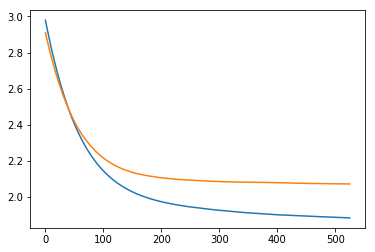

In [24]:
plt.plot(progress['train_set']['rmse'])
plt.plot(progress['validation_set']['rmse'])
plt.show()

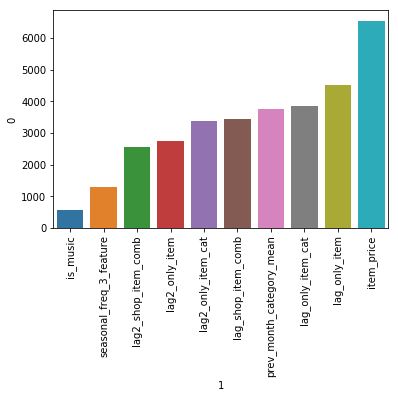

In [26]:
for_plot = pd.DataFrame([(v, k) for k, v in xgb_model_trimmed_target.get_fscore().items()])
plt.figure()
for_plot.sort_values(0,inplace=True)
sns.barplot(x = for_plot[1], y =for_plot[0])
plt.xticks(rotation = 90)
plt.show()

In [101]:
np.unique(test_33_imputed_f['item_category_id'].dropna())

array([ 2.,  3.,  5.,  6.,  7.,  9., 11., 12., 15., 16., 19., 20., 21.,
       22., 23., 24., 25., 26., 28., 29., 30., 31., 33., 34., 35., 36.,
       37., 38., 40., 41., 42., 43., 44., 45., 47., 49., 54., 55., 56.,
       57., 58., 60., 61., 62., 63., 64., 65., 67., 69., 70., 71., 72.,
       73., 74., 75., 76., 77., 78., 79., 83.])

In [347]:
#Preparing same feature for test set. using whole train set for dat.
for_test_feature_data = pd.concat([train_33_imputed,val_33_imputed], axis = 0)

In [348]:
for_test_category_encoding_monthly = for_test_feature_data.groupby(['unique','item_category_id'])['item_cnt_month'].mean().reset_index()

In [349]:
for_test_category_encoding_monthly['unique'] = for_test_category_encoding_monthly['unique'] + 1

In [350]:
test_33_imputed_new_feature = test_33_imputed_f.merge(for_test_category_encoding_monthly, how = 'left', on = ['item_category_id','unique'])

In [351]:
test_33_imputed_new_feature.rename(columns = {'item_cnt_month':'prev_month_category_mean'}, inplace = True)

In [352]:
test_33_imputed_new_feature.loc[pd.isnull(test_33_imputed_new_feature['item_category_id']), ['lag2_only_item','lag2_only_item_cat','lag2_shop_item_comb','lag_only_item','lag_only_item_cat','lag_shop_item_comb','seasonal_freq_3_feature']] = np.nan

In [353]:
#Make all feature except unique nan in test if item_category_id is nan.
test_33_imputed_new_feature.head()

,shop_id,ID,item_id,item_category_id,indicator,is_music,item_price,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,lag_only_item_cat,lag_shop_item_comb,seasonal_freq_3_feature,unique,prev_month_category_mean
0,5,0,5037,19,1,False,1693.518519,3.793103,2.312028,1.0,25.0,2443.0,0.0,-0.047512,34,1.652909
1,5,1,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN
2,5,2,5233,19,2,False,859.000000,2.666667,2.312028,3.0,42.0,2443.0,1.0,-0.047512,34,1.652909
3,5,3,5232,23,1,False,599.000000,1.846154,2.201104,0.0,28.0,2203.0,0.0,-0.047512,34,1.651424
4,5,4,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN


In [355]:
#Had to be all same.I guess I have messed up in making item_price variable.
np.sum(pd.isnull(test_33_imputed_new_feature),axis = 0)

shop_id                          0
ID                               0
item_id                          0
item_category_id             15246
indicator                        0
is_music                     15246
item_price                  102796
lag2_only_item               15246
lag2_only_item_cat           15246
lag2_shop_item_comb          15246
lag_only_item                15246
lag_only_item_cat            15246
lag_shop_item_comb           15246
seasonal_freq_3_feature      15246
unique                           0
prev_month_category_mean     15246
dtype: int64

In [44]:
test_33_imputed_new_feature[(-pd.isnull((test_33_imputed_new_feature['item_category_id']))) & (pd.isnull(test_33_imputed_new_feature['item_price']))].head()

,shop_id,ID,item_id,item_category_id,indicator,is_music,item_price,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,lag_only_item_cat,lag_shop_item_comb,seasonal_freq_3_feature,unique,prev_month_category_mean
9,5,9,5003,20,1,False,NaN,2.000000,4.299456,0.0,95.0,6596.0,0.0,-0.047512,34,3.416616
16,5,16,4874,72,1,False,NaN,1.222222,1.386990,0.0,5.0,1976.0,0.0,-0.047512,34,1.729148
21,5,21,5002,19,1,False,NaN,1.000000,2.312028,0.0,19.0,2443.0,0.0,-0.047512,34,1.647497
25,5,25,5907,20,1,False,NaN,0.000000,4.299456,0.0,37.0,6596.0,0.0,-0.047512,34,3.416616
26,5,26,5908,23,1,False,NaN,0.000000,2.201104,0.0,11.0,2203.0,0.0,-0.047512,34,1.635682


In [356]:
#I had made price based on shop_id, item_id combo. Therefore if combo not in test set then nan.
train_33_imputed[train_33_imputed['item_id'] == 5003]

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature,prev_month_category_mean
1550039,6,5003,32,3999.0,2.0,20,False,0.0,0.0,4620.0,2.935953,0.0,0.0,0.111277,2.961538
1551908,12,5003,32,3999.0,2.0,20,False,0.0,0.0,4620.0,2.935953,0.0,0.0,0.111277,2.961538
1558023,25,5003,32,3999.0,4.0,20,False,0.0,0.0,4620.0,2.935953,0.0,0.0,0.111277,2.961538
1560537,28,5003,32,3399.0,1.0,20,False,0.0,0.0,4620.0,2.935953,0.0,0.0,0.111277,2.961538
1561847,31,5003,32,3999.0,2.0,20,False,0.0,0.0,4620.0,2.935953,0.0,0.0,0.111277,2.961538
1569232,46,5003,32,3999.0,1.0,20,False,0.0,0.0,4620.0,2.935953,0.0,0.0,0.111277,2.961538


In [357]:
#Filling test item_price based on only average price of that item_id
re_test_item_price = for_test_feature_data[-pd.isnull(for_test_feature_data['item_price'])].groupby('item_id')['item_price'].mean().reset_index()


In [358]:
re_test_item_price.rename(columns={'item_price':'item_price2'}, inplace = True)

In [359]:
re_test_item_price.head()

,item_id,item_price2
0,0,58.0
1,1,4490.0
2,2,58.0
3,3,79.0
4,4,58.0


In [360]:
#Merging
test_price2_merge = test_33_imputed_new_feature.merge(re_test_item_price, how = 'left', on = 'item_id')

In [361]:
#Ok, now item_price2 seems fine.
np.sum(pd.isnull(test_price2_merge),axis = 0)

shop_id                          0
ID                               0
item_id                          0
item_category_id             15246
indicator                        0
is_music                     15246
item_price                  102796
lag2_only_item               15246
lag2_only_item_cat           15246
lag2_shop_item_comb          15246
lag_only_item                15246
lag_only_item_cat            15246
lag_shop_item_comb           15246
seasonal_freq_3_feature      15246
unique                           0
prev_month_category_mean     15246
item_price2                  15246
dtype: int64

In [362]:
test_final_imputed_new_feature = test_price2_merge.copy()

In [363]:
test_final_imputed_new_feature.drop('item_price', axis = 1, inplace = True)

In [364]:
test_33_imputed_new_feature.rename(columns={'item_price2':'item_price'}, inplace=True)

In [365]:
test_33_imputed_new_feature.head()

,shop_id,ID,item_id,item_category_id,indicator,is_music,item_price,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,lag_only_item_cat,lag_shop_item_comb,seasonal_freq_3_feature,unique,prev_month_category_mean
0,5,0,5037,19,1,False,1693.518519,3.793103,2.312028,1.0,25.0,2443.0,0.0,-0.047512,34,1.652909
1,5,1,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN
2,5,2,5233,19,2,False,859.000000,2.666667,2.312028,3.0,42.0,2443.0,1.0,-0.047512,34,1.652909
3,5,3,5232,23,1,False,599.000000,1.846154,2.201104,0.0,28.0,2203.0,0.0,-0.047512,34,1.651424
4,5,4,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN


In [366]:
np.sum(pd.isnull(test_final_imputed_new_feature),axis = 0) #All good.

shop_id                         0
ID                              0
item_id                         0
item_category_id            15246
indicator                       0
is_music                    15246
lag2_only_item              15246
lag2_only_item_cat          15246
lag2_shop_item_comb         15246
lag_only_item               15246
lag_only_item_cat           15246
lag_shop_item_comb          15246
seasonal_freq_3_feature     15246
unique                          0
prev_month_category_mean    15246
item_price2                 15246
dtype: int64

In [367]:
test_final_imputed_new_feature.head()

,shop_id,ID,item_id,item_category_id,indicator,is_music,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,lag_only_item_cat,lag_shop_item_comb,seasonal_freq_3_feature,unique,prev_month_category_mean,item_price2
0,5,0,5037,19,1,False,3.793103,2.312028,1.0,25.0,2443.0,0.0,-0.047512,34,1.652909,1960.580473
1,5,1,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN
2,5,2,5233,19,2,False,2.666667,2.312028,3.0,42.0,2443.0,1.0,-0.047512,34,1.652909,844.516003
3,5,3,5232,23,1,False,1.846154,2.201104,0.0,28.0,2203.0,0.0,-0.047512,34,1.651424,792.527697
4,5,4,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN


In [148]:
#Next up iss filling these 15246 missing values, skipping for now as there is xgboost.
#TBC....

In [368]:
#Renaming item_price2 as item_price again
test_final_imputed_new_feature.rename(columns = {'item_price2':'item_price'}, inplace = True)

In [369]:
train_imputed_pre_category_mean.head()

,shop_id,item_id,unique,item_price,item_cnt_month,item_category_id,is_music,lag_shop_item_comb,lag_only_item,lag_only_item_cat,lag2_only_item_cat,lag2_shop_item_comb,lag2_only_item,seasonal_freq_3_feature,prev_month_category_mean
0,0,32,0,221.0,6.0,40,False,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765,NaN
1,0,33,0,347.0,3.0,37,False,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765,NaN
2,0,35,0,247.0,1.0,40,False,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765,NaN
3,0,43,0,221.0,1.0,40,False,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765,NaN
4,0,51,0,128.5,2.0,57,True,0.0,0.0,0.0,0.0,0.0,0.0,-0.063765,NaN


In [370]:
max(train_imputed_pre_category_mean['prev_month_category_mean'].dropna())

732.5714285714286

In [371]:
train_33_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1).columns.values

array(['item_price', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature',
       'prev_month_category_mean'], dtype=object)

In [372]:
test_final_imputed_new_feature_xg = test_final_imputed_new_feature[train_33_imputed.drop(['shop_id','item_id','item_category_id','item_cnt_month','unique'], axis = 1).columns.values]

In [373]:
test_final_imputed_new_feature_xg.columns

Index(['item_price', 'is_music', 'lag_shop_item_comb', 'lag_only_item',
       'lag_only_item_cat', 'lag2_only_item_cat', 'lag2_shop_item_comb',
       'lag2_only_item', 'seasonal_freq_3_feature',
       'prev_month_category_mean'],
      dtype='object')

In [374]:
test_final_imputed_new_feature_xg['is_music'] = test_final_imputed_new_feature_xg['is_music'].astype(np.float)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [375]:
xg_test = xgboost.DMatrix(test_final_imputed_new_feature_xg)

In [376]:
xg_test.feature_names

['item_price',
 'is_music',
 'lag_shop_item_comb',
 'lag_only_item',
 'lag_only_item_cat',
 'lag2_only_item_cat',
 'lag2_shop_item_comb',
 'lag2_only_item',
 'seasonal_freq_3_feature',
 'prev_month_category_mean']

In [377]:
predict = xgb_model_trimmed_target.predict(xg_test)

In [378]:
only_nans = test_final_imputed_new_feature_xg[pd.isnull(test_final_imputed_new_feature_xg['item_price'])]

In [379]:
np.unique(train_imputed_pre_category_mean['item_category_id'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


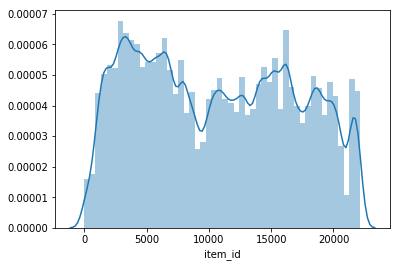

In [380]:
sns.distplot(train_imputed_pre_category_mean['item_id'])

In [381]:
#Some analysis
exp1 = test_final_imputed_new_feature.groupby('item_id').size().reset_index()

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


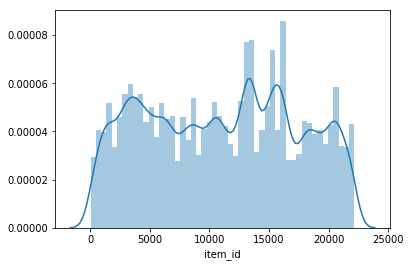

In [382]:
sns.distplot(test_final_imputed_new_feature['item_id'])

In [383]:
exp2 = test_final_imputed_new_feature.groupby('item_id').agg({'item_price':np.unique}).reset_index()

In [384]:
exp2['types'] = exp2['item_price'].apply(lambda x : str(type(x)))

In [385]:
exp2_diffs = exp2[exp2['types'] == "<class 'numpy.ndarray'>"]

In [386]:
exp2_diffs.shape #bazinga.

(363, 3)

In [387]:
exp3 = test_final_imputed_new_feature.groupby('item_id').agg({'item_category_id':np.unique}).reset_index()

In [388]:
exp3['types'] = exp3['item_category_id'].apply(lambda x : str(type(x)))

In [389]:
exp3_diffs = exp3[exp3['types'] == "<class 'numpy.ndarray'>"]

In [390]:
exp3_diffs.shape

(363, 3)

In [391]:
len(np.unique(test_final_imputed_new_feature[pd.isnull(test_final_imputed_new_feature['item_category_id'])]['item_id']))

363

In [392]:
#exacto

In [393]:
#Filling values by nearest item_id in the same category.

In [394]:
test_final_imputed_new_feature.head()

,shop_id,ID,item_id,item_category_id,indicator,is_music,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,lag_only_item_cat,lag_shop_item_comb,seasonal_freq_3_feature,unique,prev_month_category_mean,item_price
0,5,0,5037,19,1,False,3.793103,2.312028,1.0,25.0,2443.0,0.0,-0.047512,34,1.652909,1960.580473
1,5,1,5320,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN
2,5,2,5233,19,2,False,2.666667,2.312028,3.0,42.0,2443.0,1.0,-0.047512,34,1.652909,844.516003
3,5,3,5232,23,1,False,1.846154,2.201104,0.0,28.0,2203.0,0.0,-0.047512,34,1.651424,792.527697
4,5,4,5268,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN


In [395]:
#Get prediction of a nan row same as that of the nearest item_id.
submission = pd.DataFrame({'ID':test_final_imputed_new_feature['ID'].values,'item_cnt_month':predict,'item_category_id':test_final_imputed_new_feature['item_category_id'],'item_id':test_final_imputed_new_feature['item_id']})

In [396]:
np.isnan(submission['item_category_id'][1])

True

In [397]:
submission_sorted = submission.sort_values('item_id').reset_index()

In [398]:
'''for i in range(len(submission_sorted)):
    if(np.isnan(submission_sorted['item_category_id'][i])):
        if(abs(submission_sorted['item_id'][i] - submission_sorted['item_id'][i-1])) > abs(submission_sorted['item_id'][i] - submission_sorted['item_id'][i+1]):
            submission_sorted['item_cnt_month'][i] = submission_sorted['item_cnt_month'][i+1]
        else:
            submission_sorted['item_cnt_month'][i] = submission_sorted['item_cnt_month'][i-1]'''

"for i in range(len(submission_sorted)):\n    if(np.isnan(submission_sorted['item_category_id'][i])):\n        if(abs(submission_sorted['item_id'][i] - submission_sorted['item_id'][i-1])) > abs(submission_sorted['item_id'][i] - submission_sorted['item_id'][i+1]):\n            submission_sorted['item_cnt_month'][i] = submission_sorted['item_cnt_month'][i+1]\n        else:\n            submission_sorted['item_cnt_month'][i] = submission_sorted['item_cnt_month'][i-1]"

In [399]:
print("yes")

yes


In [400]:
submission.head()

,ID,item_category_id,item_cnt_month,item_id
0,0,19,1.292938,5037
1,1,NaN,4.701649,5320
2,2,19,1.793084,5233
3,3,23,1.339751,5232
4,4,NaN,4.701649,5268


In [401]:
??NearestNeighbors

In [402]:
submission_item_id_drop_duplicates = submission['item_id'].copy().drop_duplicates()

In [403]:
neigh = NearestNeighbors(n_neighbors=10)

In [404]:
neigh.fit(np.expand_dims(submission_item_id_drop_duplicates.values,-1))

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [405]:
vio = neigh.kneighbors(np.expand_dims(submission_item_id_drop_duplicates.values,-1))

In [406]:
nn = pd.DataFrame({'neigbor1':vio[1][:,0],'neigbor2':vio[1][:,1],'neigbor3':vio[1][:,2],'neigbor4':vio[1][:,3],'neigbor5':vio[1][:,4],'neigbor6':vio[1][:,5],'neigbor7':vio[1][:,6],'neigbor8':vio[1][:,7],'neigbor9':vio[1][:,8],'neigbor10':vio[1][:,9],'item_id':submission_item_id_drop_duplicates.values})

In [407]:
nn10 = nn

In [408]:
submit_fin = submission.merge(nn10, how='left', on = 'item_id')

In [409]:
submit_fin.head(9)

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873
1,1,NaN,4.701649,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128
4,4,NaN,4.701649,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966
5,5,23,1.418513,5039,5,7,2487,6,0,1935,1575,967,4828,1873
6,6,20,1.917915,5041,6,4828,1575,967,5,1873,2487,0,1935,7
7,7,55,1.116451,5046,7,3808,1873,967,1575,968,6,5,2487,0
8,8,55,1.452972,5319,8,2478,1,3516,1576,2480,2479,2488,971,2481


In [410]:
submit_fin['value_nn_2'] = submit_fin['neigbor2'].apply(lambda x : submit_fin['item_cnt_month'][x])

Nan and 4.701649, must not be there, after multiple imputation of knn

In [411]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732
1,1,NaN,4.701649,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084
4,4,NaN,4.701649,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649


In [412]:
submit_fin.loc[pd.isnull(submit_fin['item_category_id']), 'item_cnt_month'] = submit_fin['value_nn_2']

In [413]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084
4,4,NaN,4.701649,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649


In [414]:
submit_fin['value_nn_3'] = submit_fin['neigbor3'].apply(lambda x : submit_fin['item_cnt_month'][x])

In [415]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662
4,4,NaN,4.701649,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535


In [416]:
submit_fin.loc[(pd.isnull(submit_fin['item_category_id'])) & (submit_fin['item_cnt_month']==4.701649) , 'item_cnt_month'] = submit_fin['value_nn_3']

In [417]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662
4,4,NaN,1.273535,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535


In [418]:
submit_fin['value_nn_4'] = submit_fin['neigbor4'].apply(lambda x : submit_fin['item_cnt_month'][x])

In [419]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3,value_nn_4
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563,1.144336
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649,1.202262
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662,1.142034
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662,1.142034
4,4,NaN,1.273535,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535,1.223111


In [420]:
submit_fin.loc[(pd.isnull(submit_fin['item_category_id'])) & (submit_fin['item_cnt_month']==4.701649) , 'item_cnt_month'] = submit_fin['value_nn_4']

In [421]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3,value_nn_4
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563,1.144336
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649,1.202262
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662,1.142034
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662,1.142034
4,4,NaN,1.273535,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535,1.223111


In [422]:
submit_fin['value_nn_5'] = submit_fin['neigbor5'].apply(lambda x : submit_fin['item_cnt_month'][x])

In [423]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3,value_nn_4,value_nn_5
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563,1.144336,1.418513
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649,1.202262,1.202262
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662,1.142034,1.282718
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662,1.142034,1.282718
4,4,NaN,1.273535,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535,1.223111,6.743955


In [424]:
submit_fin.loc[(pd.isnull(submit_fin['item_category_id'])) & (submit_fin['item_cnt_month']==4.701649) , 'item_cnt_month'] = submit_fin['value_nn_5']

In [425]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3,value_nn_4,value_nn_5
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563,1.144336,1.418513
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649,1.202262,1.202262
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662,1.142034,1.282718
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662,1.142034,1.282718
4,4,NaN,1.273535,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535,1.223111,6.743955


In [426]:
submit_fin['value_nn_6'] = submit_fin['neigbor6'].apply(lambda x : submit_fin['item_cnt_month'][x])

In [427]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3,value_nn_4,value_nn_5,value_nn_6
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563,1.144336,1.418513,1.917915
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649,1.202262,1.202262,1.240469
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662,1.142034,1.282718,1.317809
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662,1.142034,1.282718,1.317809
4,4,NaN,1.273535,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535,1.223111,6.743955,1.317809


In [428]:
submit_fin.loc[(pd.isnull(submit_fin['item_category_id'])) & (submit_fin['item_cnt_month']==4.701649) , 'item_cnt_month'] = submit_fin['value_nn_6']

In [429]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3,value_nn_4,value_nn_5,value_nn_6
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563,1.144336,1.418513,1.917915
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649,1.202262,1.202262,1.240469
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662,1.142034,1.282718,1.317809
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662,1.142034,1.282718,1.317809
4,4,NaN,1.273535,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535,1.223111,6.743955,1.317809


In [430]:
submit_fin['value_nn_7'] = submit_fin['neigbor7'].apply(lambda x : submit_fin['item_cnt_month'][x])

In [431]:
submit_fin.head()

,ID,item_category_id,item_cnt_month,item_id,neigbor1,neigbor10,neigbor2,neigbor3,neigbor4,neigbor5,neigbor6,neigbor7,neigbor8,neigbor9,value_nn_2,value_nn_3,value_nn_4,value_nn_5,value_nn_6,value_nn_7
0,0,19,1.292938,5037,0,7,2487,1935,4828,5,6,1575,967,1873,1.845732,1.159563,1.144336,1.418513,1.917915,1.192742
1,1,NaN,1.452972,5320,1,2478,8,3516,1576,2480,2479,971,2488,2481,1.452972,4.701649,1.202262,1.202262,1.240469,1.099450
2,2,19,1.793084,5233,2,3917,3,3512,2844,966,1574,2485,1881,1128,1.339751,1.223662,1.142034,1.282718,1.317809,1.317809
3,3,23,1.339751,5232,3,3917,2,3512,2844,966,1574,2485,1881,1128,1.793084,1.223662,1.142034,1.282718,1.317809,1.317809
4,4,NaN,1.273535,5268,4,2844,965,2843,3920,4373,2485,1574,4372,966,4.701649,1.273535,1.223111,6.743955,1.317809,1.317809


In [432]:
submit_fin.loc[(pd.isnull(submit_fin['item_category_id'])) & (submit_fin['item_cnt_month']==4.701649) , 'item_cnt_month'] = submit_fin['value_nn_7']

In [433]:
submit_fin['value_nn_8'] = submit_fin['neigbor8'].apply(lambda x : submit_fin['item_cnt_month'][x])

In [434]:
submit_fin.loc[(pd.isnull(submit_fin['item_category_id'])) & (submit_fin['item_cnt_month']==4.701649) , 'item_cnt_month'] = submit_fin['value_nn_8']

In [435]:
submit_fin['value_nn_9'] = submit_fin['neigbor9'].apply(lambda x : submit_fin['item_cnt_month'][x])

In [436]:
submit_fin.loc[(pd.isnull(submit_fin['item_category_id'])) & (submit_fin['item_cnt_month']==4.701649) , 'item_cnt_month'] = submit_fin['value_nn_9']

In [437]:
submit_fin['value_nn_10'] = submit_fin['neigbor10'].apply(lambda x : submit_fin['item_cnt_month'][x])

In [438]:
submit_fin.loc[(pd.isnull(submit_fin['item_category_id'])) & (submit_fin['item_cnt_month']==4.701649) , 'item_cnt_month'] = submit_fin['value_nn_10']

In [439]:
# No more, I am done. 10 nearestneighbors, Im am submitting

In [440]:
submit_fin_final = submit_fin[['ID','item_cnt_month']].copy()

In [441]:
submit_fin_final.loc[submit_fin_final['item_cnt_month']>20,'item_cnt_month'] = 20

In [442]:
submit_fin_final.loc[submit_fin_final['item_cnt_month']>20]

,ID,item_cnt_month


In [443]:
submit_fin_final.loc[submit_fin_final['item_cnt_month']<0]

,ID,item_cnt_month


In [444]:
submit_fin_final.to_csv('submit_fin_final.csv',index = False)

In [445]:
monitoring_data = pd.read_csv('monitoring_data.csv')

In [446]:
monitoring_data.head()

,Unnamed: 0,Model1,Model2,Model3,Model4,Ensemble_Type,Val_Prediction_Name,Test_Prediction_Name,Validation_Type,Validation Set,Validation_Score_before_clip,Validation_Score_after_clip,Public_LB_Score,Features
0,0,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble,trip_ens_submission,Time_based,dropped_col_val33_no_na,22.152129,2.163706,1.17125,Lag1
1,1,xg_model_1_001_subsample_1,lm_model_standardized,rf_n_est_1000_depth_3_sqrt,None,Average,triple_ensemble_sub_025,trip_ens_submission_sub_025,Time_based,dropped_col_val33_no_na,22.152377,2.160372,1.16766,Lag1
2,2,xg_model_1_001_subsample_1,lm_model,None,None,Average,ensemble_lin_xgb,test_ensemble_lin_xgb,Time_based,dropped_col_val33_no_na,20.782377,2.151485,1.14767,Lag1
3,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092,ensemble_lin_xgb_0092_lag1_lag2_season,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.935000,2.047780,1.09124,Lag1_Lag2_Seasonal
4,0,xg_model_6_01_subsample_1,lm_model,None,None,alpha(0.092*lm+0.908*xg),ensemble_lin_xgb_0092_less_0025,ensemble_lin_xgb_0092_lag1_lag2_season_less_0025,Time_based,subset_of_train_full_lag1_lag2_seasonal,24.936000,2.050922,1.09067,Lag1_Lag2_Seasonal


In [447]:
#Okay , fucked up only xg sucks for some reason.

In [448]:
#Let the current prediction I have be for xg. Linear model will average it out.
#NO fuck it. I'm cross validating.

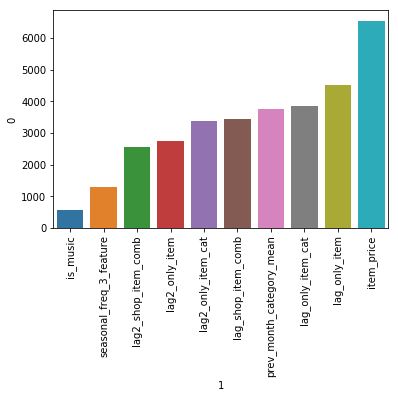

In [449]:
for_plot = pd.DataFrame([(v, k) for k, v in xgb_model_trimmed_target.get_fscore().items()])
plt.figure()
for_plot.sort_values(0,inplace=True)
sns.barplot(x = for_plot[1], y =for_plot[0])
plt.xticks(rotation = 90)
plt.show()

In [450]:
lm_model_trimmed_new_feature = LinearRegression()

In [451]:
#Want to fill monitoring data ?? naaaaa not because fucked up accuracy.
test_final_imputed_new_feature.to_csv('test_final_imputed_new_feature_no_trim.csv',index = False)

In [452]:
test_final_imputed_new_feature.describe()

,shop_id,ID,item_id,indicator,lag2_only_item,lag2_only_item_cat,lag2_shop_item_comb,lag_only_item,lag_only_item_cat,lag_shop_item_comb,seasonal_freq_3_feature,unique,prev_month_category_mean,item_price
count,214200.000000,214200.000000,214200.000000,214200.000000,198954.000000,198954.000000,198954.000000,198954.000000,198954.000000,198954.000000,1.989540e+05,214200.0,198954.000000,198954.000000
mean,31.642857,107099.500000,11019.398627,0.913338,1.488493,2.070880,0.295666,14.308001,3221.669411,0.315897,-4.751237e-02,34.0,2.484728,1024.694028
std,17.561933,61834.358168,6252.644590,0.589016,6.389240,4.747874,2.591761,78.117763,2646.745049,5.759122,1.315618e-13,0.0,10.558505,1979.721806
min,2.000000,0.000000,30.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,3.000000,-1.000000,-4.751237e-02,34.0,1.000000,4.895753
25%,16.000000,53549.750000,5381.500000,1.000000,1.000000,1.275641,0.000000,1.000000,888.000000,0.000000,-4.751237e-02,34.0,1.350698,281.109010
50%,34.500000,107099.500000,11203.000000,1.000000,1.000000,1.555887,0.000000,4.000000,2290.000000,0.000000,-4.751237e-02,34.0,1.651424,488.362500
75%,47.000000,160649.250000,16071.500000,1.000000,1.363636,2.013889,0.000000,12.000000,5808.000000,0.000000,-4.751237e-02,34.0,2.156250,1247.578836
max,59.000000,214199.000000,22167.000000,2.000000,258.000000,102.000000,473.000000,4078.000000,7680.000000,2253.000000,-4.751237e-02,34.0,252.400000,40453.407407
